In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('cmc.data', header=None)

In [3]:
df

,0,1,2,3,4,5,6,7,8,9
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1
...,...,...,...,...,...,...,...,...,...,...
1468,33,4,4,2,1,0,2,4,0,3
1469,33,4,4,3,1,1,1,4,0,3
1470,39,3,3,8,1,0,1,4,0,3
1471,33,3,3,4,1,0,2,2,0,3


In [4]:
with open("cmc.names") as f:
    print(f.read())

1. Title: Contraceptive Method Choice

2. Sources:
   (a) Origin:  This dataset is a subset of the 1987 National Indonesia
                Contraceptive Prevalence Survey
   (b) Creator: Tjen-Sien Lim (limt@stat.wisc.edu)
   (c) Donor:   Tjen-Sien Lim (limt@stat.wisc.edu)
   (c) Date:    June 7, 1997

3. Past Usage:
   Lim, T.-S., Loh, W.-Y. & Shih, Y.-S. (1999). A Comparison of
   Prediction Accuracy, Complexity, and Training Time of Thirty-three
   Old and New Classification Algorithms. Machine Learning. Forthcoming.
   (ftp://ftp.stat.wisc.edu/pub/loh/treeprogs/quest1.7/mach1317.pdf or
   (http://www.stat.wisc.edu/~limt/mach1317.pdf)

4. Relevant Information:
   This dataset is a subset of the 1987 National Indonesia Contraceptive
   Prevalence Survey. The samples are married women who were either not 
   pregnant or do not know if they were at the time of interview. The 
   problem is to predict the current contraceptive method choice 
   (no use, long-term methods, or short-term m

In [5]:
indexes = ['W_age',"W_edu","H_edu",'Childs',"W_religion","W_working","H_occupation","Std_of_living_index","Media_exposure","CMC"]

In [6]:
df.columns = indexes

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   W_age                1473 non-null   int64
 1   W_edu                1473 non-null   int64
 2   H_edu                1473 non-null   int64
 3   Childs               1473 non-null   int64
 4   W_religion           1473 non-null   int64
 5   W_working            1473 non-null   int64
 6   H_occupation         1473 non-null   int64
 7   Std_of_living_index  1473 non-null   int64
 8   Media_exposure       1473 non-null   int64
 9   CMC                  1473 non-null   int64
dtypes: int64(10)
memory usage: 115.2 KB


In [8]:
#Lets change the categorical cols to object type, so that we can simply create dummies.

cols = df.columns.to_list()

cols.remove('W_age')
cols.remove('Childs')
cols.remove('CMC')

In [9]:
for clnm in cols:
    df[cols] = df[cols].astype('object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   W_age                1473 non-null   int64 
 1   W_edu                1473 non-null   object
 2   H_edu                1473 non-null   object
 3   Childs               1473 non-null   int64 
 4   W_religion           1473 non-null   object
 5   W_working            1473 non-null   object
 6   H_occupation         1473 non-null   object
 7   Std_of_living_index  1473 non-null   object
 8   Media_exposure       1473 non-null   object
 9   CMC                  1473 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 115.2+ KB


In [11]:
df.groupby('CMC').count()

,W_age,W_edu,H_edu,Childs,W_religion,W_working,H_occupation,Std_of_living_index,Media_exposure
CMC,,,,,,,,,
1,629,629,629,629,629,629,629,629,629
2,333,333,333,333,333,333,333,333,333
3,511,511,511,511,511,511,511,511,511


In [12]:
# ovs = df[df['CMC']==2][:250]

# df = pd.concat([df,ovs])

In [13]:
df.groupby('CMC').count()

,W_age,W_edu,H_edu,Childs,W_religion,W_working,H_occupation,Std_of_living_index,Media_exposure
CMC,,,,,,,,,
1,629,629,629,629,629,629,629,629,629
2,333,333,333,333,333,333,333,333,333
3,511,511,511,511,511,511,511,511,511


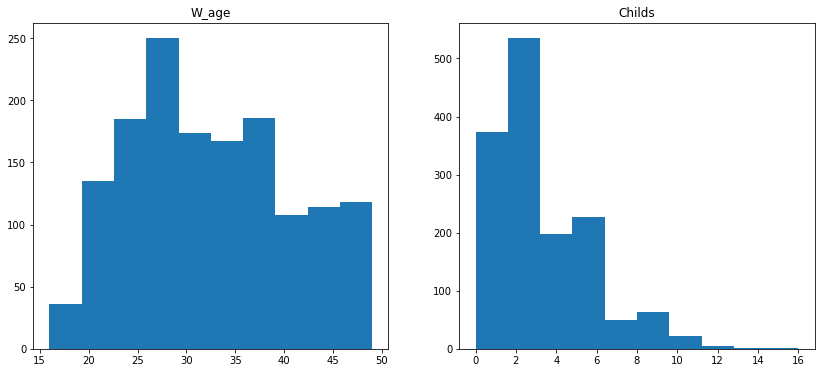

In [14]:
plt.figure(figsize=(14,6))

for i,nm in enumerate(['W_age','Childs']):
    plt.subplot(1,2,i+1)
    plt.hist(df[nm])
    plt.title(nm)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   W_age                1473 non-null   int64 
 1   W_edu                1473 non-null   object
 2   H_edu                1473 non-null   object
 3   Childs               1473 non-null   int64 
 4   W_religion           1473 non-null   object
 5   W_working            1473 non-null   object
 6   H_occupation         1473 non-null   object
 7   Std_of_living_index  1473 non-null   object
 8   Media_exposure       1473 non-null   object
 9   CMC                  1473 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 115.2+ KB


In [16]:
# Y = df['CMC']
# X = df.drop(columns=['CMC'])

X= df.iloc[:,0:-1]
Y= df.iloc[:,-1]

In [17]:
X = pd.get_dummies(X)

In [18]:
# for cl in X.columns:
#     X[cl] = X[cl].astype('float')

In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   W_age                  1473 non-null   int64
 1   Childs                 1473 non-null   int64
 2   W_edu_1                1473 non-null   uint8
 3   W_edu_2                1473 non-null   uint8
 4   W_edu_3                1473 non-null   uint8
 5   W_edu_4                1473 non-null   uint8
 6   H_edu_1                1473 non-null   uint8
 7   H_edu_2                1473 non-null   uint8
 8   H_edu_3                1473 non-null   uint8
 9   H_edu_4                1473 non-null   uint8
 10  W_religion_0           1473 non-null   uint8
 11  W_religion_1           1473 non-null   uint8
 12  W_working_0            1473 non-null   uint8
 13  W_working_1            1473 non-null   uint8
 14  H_occupation_1         1473 non-null   uint8
 15  H_occupation_2         1473 non-null  

In [20]:
X

,W_age,Childs,W_edu_1,W_edu_2,W_edu_3,W_edu_4,H_edu_1,H_edu_2,H_edu_3,H_edu_4,...,H_occupation_1,H_occupation_2,H_occupation_3,H_occupation_4,Std_of_living_index_1,Std_of_living_index_2,Std_of_living_index_3,Std_of_living_index_4,Media_exposure_0,Media_exposure_1
0,24,3,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,1,0
1,45,10,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,1,0
2,43,7,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,1,0
3,42,9,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
4,36,8,0,0,1,0,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,33,2,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,1,1,0
1469,33,3,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,1,1,0
1470,39,8,0,0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,1,1,0
1471,33,4,0,0,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0


<AxesSubplot:>

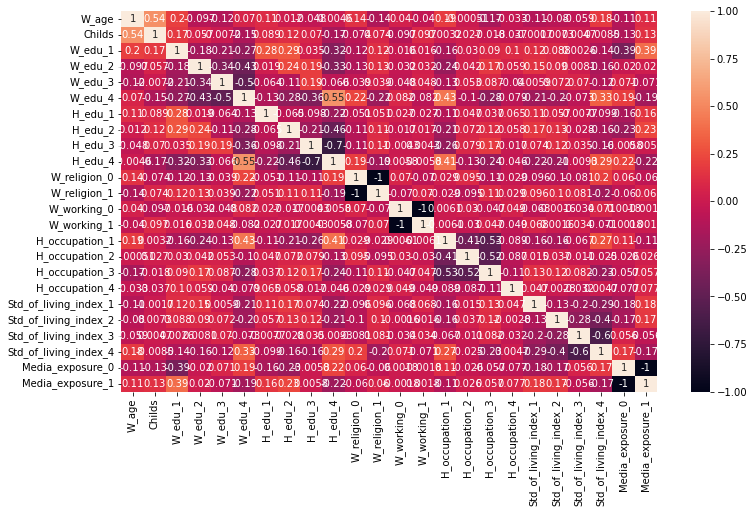

In [21]:
import seaborn as sns

plt.figure(figsize=(12,7))
sns.heatmap(X.corr(), annot=True)

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test , y_train, y_test = train_test_split(X,Y,test_size=0.15, random_state=3)

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [24]:
y_train

1240    2
187     1
87      1
1246    2
1373    3
       ..
789     3
256     1
968     3
952     3
1273    2
Name: CMC, Length: 1252, dtype: int64

In [25]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(X_train, y_train)

GaussianNB()

In [26]:
y_pred = model.predict(X_test)

In [27]:
model.score(X_test, y_test)

0.3891402714932127

In [28]:
from sklearn.metrics import confusion_matrix

cnfm = confusion_matrix(y_test, y_pred)

<AxesSubplot:>

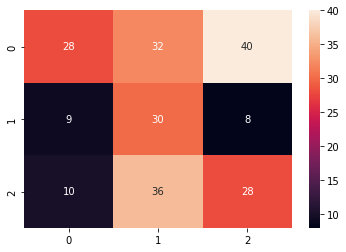

In [29]:
import seaborn as sns
sns.heatmap(cnfm, annot=True)